# 1. Can we find what matters most by removing those that do not matter?

This is motivated by the fact that the saliency methods are not accurate enough to compare two high-important values, but are accurate enough to evaluate if a piece is non-relevant.

### 1 a)  Removing the piece that has the least influence on the saliency of other pieces

In [1]:
from utils import *

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


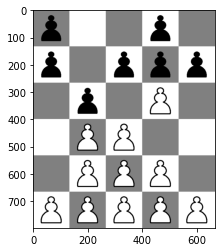

In [82]:
grid = np.array([[2, 0, 0, 2, 0],
                [2, 0, 2, 2, 2],
                [0, 2, 0, 1, 0],
                [0, 1, 1, 0, 0],
                [0, 1, 1, 1, 0],
                [1, 1, 1, 1, 1]])
player_to_move = 1

board = Board(5, grid)
state = State(board=board, player_to_move = player_to_move)
plt.imshow(get_image_array(state))

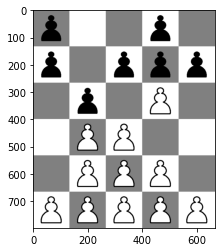

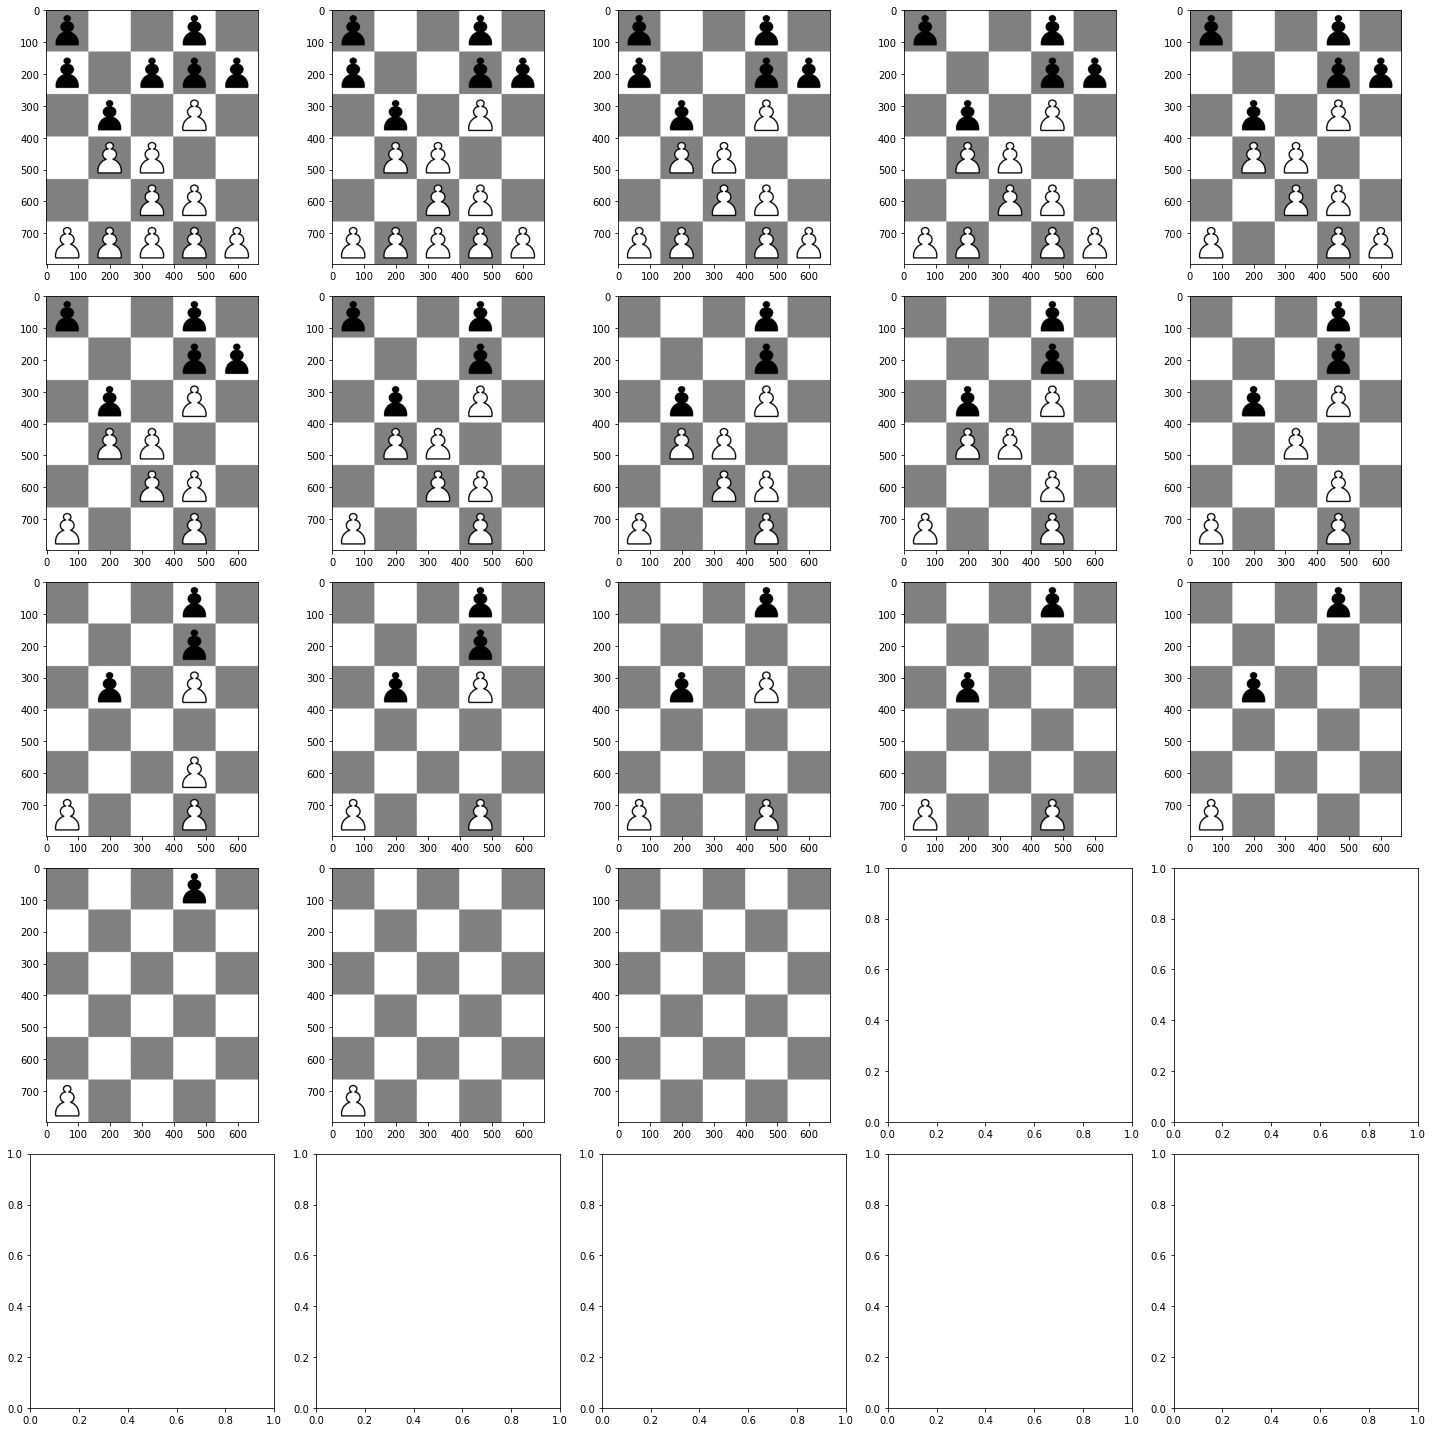

In [83]:
mat_org = get_integrated_gradients(state)
state_inter = copy.deepcopy(state)
plt.imshow(get_image_array(state))
plt.show()

total_num = np.sum(state.board.grid != 0)
grid_size = int(np.ceil(np.sqrt(total_num)))

fig, axs = plt.subplots(grid_size, grid_size, figsize = (20,20))

for num in range(total_num):
    pieces_pos = np.where(state_inter.board.grid != 0)
    mats = []
    for idx, (x,y) in enumerate(zip(pieces_pos[0],pieces_pos[1])):
        state_ = copy.deepcopy(state)
        state_.board.grid[x,y] = 0
        mat = get_integrated_gradients(state_)
        mats.append(mat-mat_org)
    mats_arr = np.stack(mats)
    total_diff = np.median(np.abs(mats_arr), axis = (1,2,3))
    
    min_diff = np.argmin(total_diff)
    
    throw_idx = (pieces_pos[0][min_diff], pieces_pos[1][min_diff])    
    state_inter.board.grid[throw_idx[0], throw_idx[1]] = 0
    
    
    axs[num // grid_size, num % grid_size].imshow(get_image_array(state_inter))
plt.tight_layout()
plt.show()
    

### 1 b) Removing the piece that has the lowest saliency

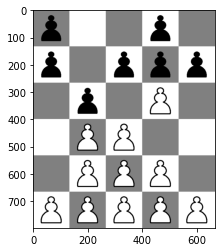

In [84]:
grid = np.array([[2, 0, 0, 2, 0],
                [2, 0, 2, 2, 2],
                [0, 2, 0, 1, 0],
                [0, 1, 1, 0, 0],
                [0, 1, 1, 1, 0],
                [1, 1, 1, 1, 1]])
player_to_move = 1

board = Board(5, grid)
state = State(board=board, player_to_move = player_to_move)
plt.imshow(get_image_array(state))

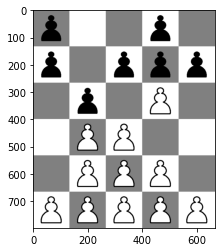

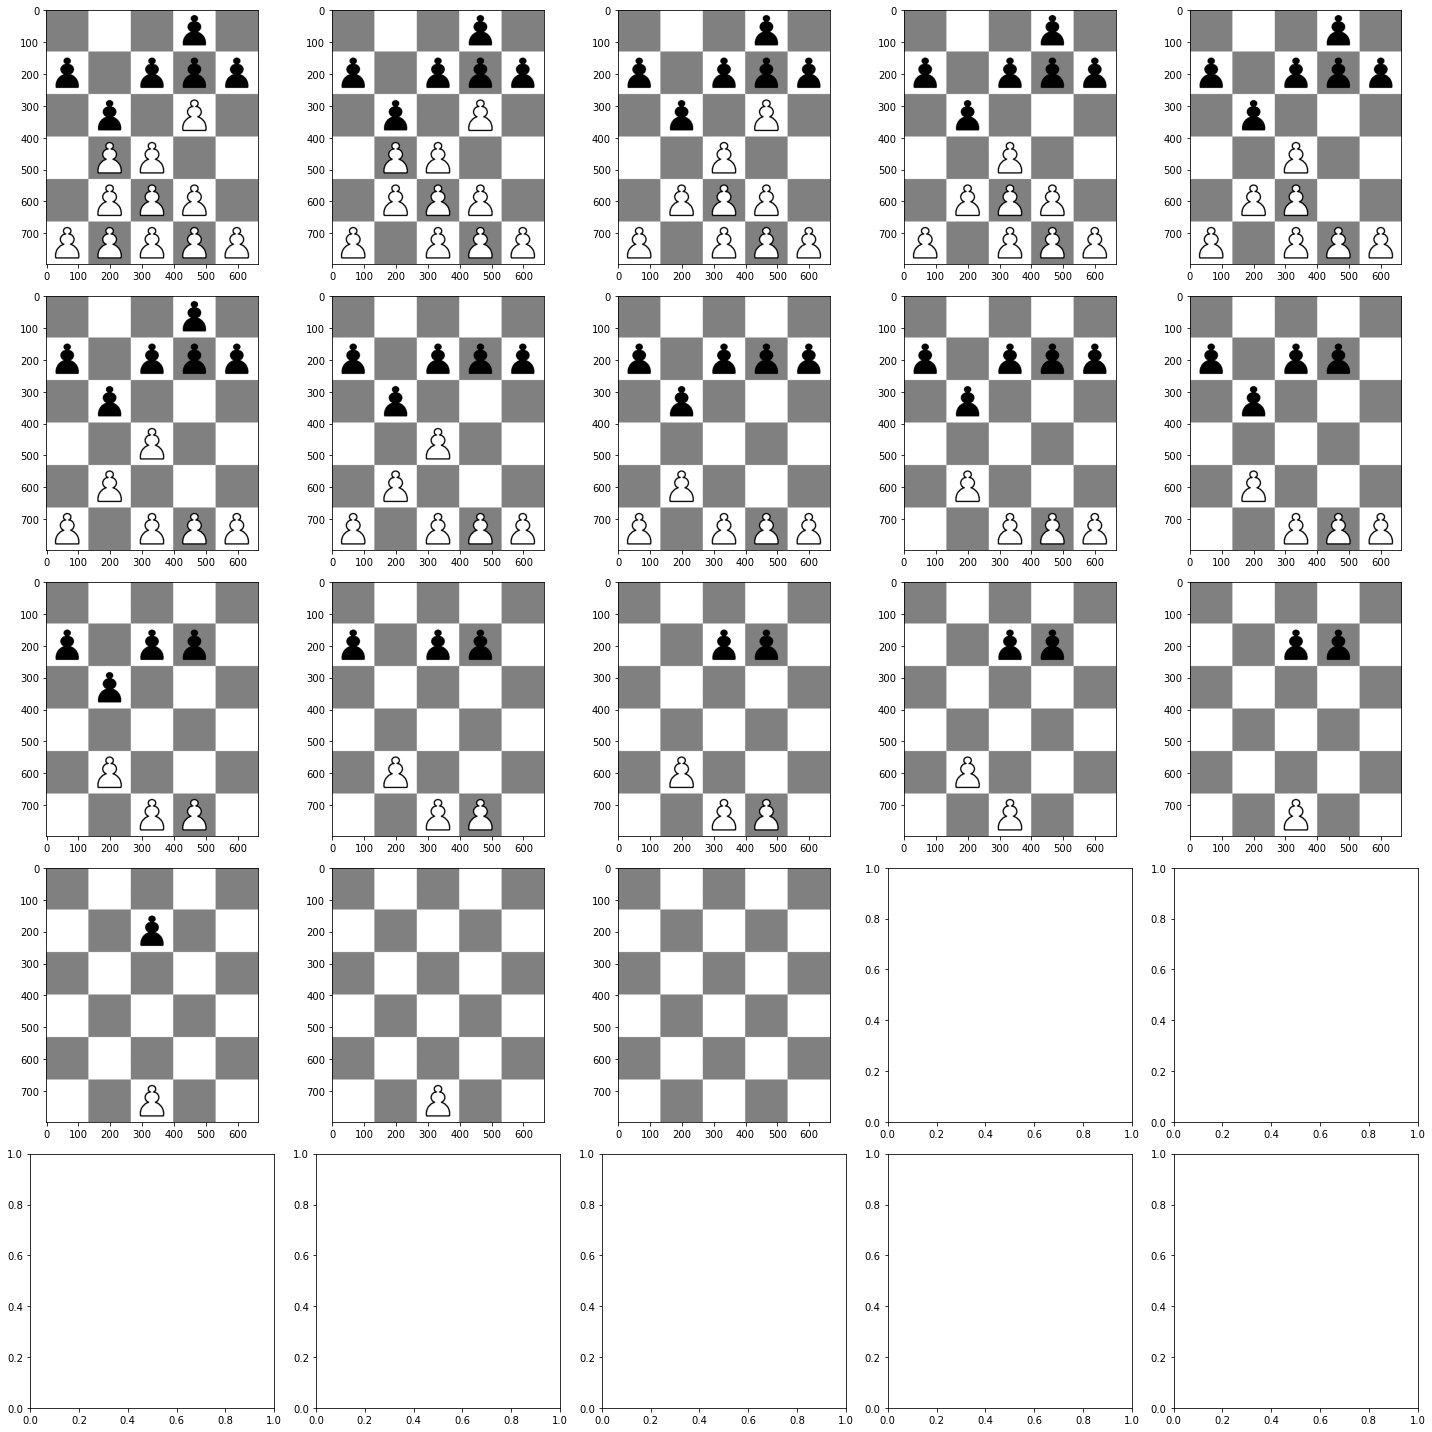

In [85]:
mat_org = get_integrated_gradients(state)
state_inter = copy.deepcopy(state)
plt.imshow(get_image_array(state))
plt.show()

total_num = np.sum(state.board.grid != 0)
grid_size = int(np.ceil(np.sqrt(total_num)))

fig, axs = plt.subplots(grid_size, grid_size, figsize = (20,20))

for num in range(total_num):
    pieces_pos = np.where(state_inter.board.grid != 0)
    mats = []
    
    mat = get_integrated_gradients(state_inter)
    m = np.abs(mat[:2]).sum(axis = 0)
    m[m ==0] = 99
    throw_idx = np.unravel_index(np.argmin(m, axis=None), m.shape)
      
    state_inter.board.grid[throw_idx[0], throw_idx[1]] = 0
    
    
    axs[num // grid_size, num % grid_size].imshow(get_image_array(state_inter))
plt.tight_layout()
plt.show()
    